In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [50]:
df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv", sep= ",")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


The dataset is an appointment scheduling data of patient in some neighboord in barazil.

NB: From the No_show column, No means the patient show up
Yes means the patient did not show up on the appointment day

Question:
from the dataset, we will be working on
1. correlation between male patient and female patient
2. correlation between those that show up at the on the appointment date
4. significant different of those that schedule appointment to those that later went
5. relatiosnhip between those that got message to those that didnt get a message and effect on showing up on the day.
3. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [3]:
#duplicating the main dataset
dfc= df.copy()

 Data cleaning 

In [51]:
dfcc= dfc.columns
dfc1= []
for i in dfcc:
    dfc1.append(i.replace("-", "_"))

dfc.columns= dfc1
dfc.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

Putting the column to right order. From the main dataset, the columns are not well labelled. 

In [13]:
#checking for duplicate row
dfc[dfc.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


There is no Duplicated row in the data set

In [5]:
# dfc.dtypes
# dfc.isna().sum()


Checking the datatype and also to know if there is empty value in the dataset.
based on the check, There is no null value in the dataset.

In [23]:
#saving the cleaned dataset
dfc.to_csv("cleaned_df.csv", index= False)

In [6]:
dfc= pd.read_csv("cleaned_df.csv")
dfc.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Exploratory Analysis

In [21]:
# dfc.describe()

In [53]:
#converting the no_show column to integer in order to make it easy for correlation
dfcc= dfc.copy() 
dfcc['No_show'] = dfcc['No_show'].map({'No': 1, 'Yes': 0})
dfcc

#recall: No: the patient showed up
#        Yes: The patient did not show up

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [85]:
dfcc.to_csv("try_df.csv", index= False)

converting the yes and no object type to 1 and 0 for easy correlation analysis

Checking the skewness of the data

array([[<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'No_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

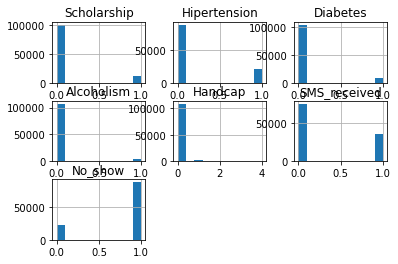

In [54]:
dfcc.iloc[:, 7:].hist()

From the graph, it was observed that the te ailment such as Hipertenson, Diabeties, Alcoholism, Handicap are skewed to right denoting that less people has this ailment. 
it was alos observed that No_show column(showing up on appointmnet day) is skewed to the left signifying that more people showed up on the appointment day. 
Note: for the ailemt type, scholarship: 0 means not having while 1 means having the ailment
        for No_show: 0 means the patient did not show up, while 1 means patient showed up

In [55]:
#checking the percentatge count between patient with differnt ailment and also their age differece 

def count(x):
        
    print(dfcc[x].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    #this convert the count no to percentage.
    #mul means multiply by
    
#      print(dfc[x].value_counts()
print("\n The % of those that show up on appoinment day against those that didnt")
count("Gender")
print("\n The % of those that show up on appoinment day against those that didnt")
count("No_show")
print("\n The % of patient that received SMS with regards to their apointment schedule to those that didnt")
count("SMS_received")
print("\n The % of patient that has a barasilain welfare programme to patient that dosent")
count("Scholarship")
print("\n The % of patient that has hipertension to patient that dosent")
count("Hipertension")
print("\n The % of patient that is handcap to patient that dosent")
count("Handcap")
print("\n The % of patient that has Daibetes to patient that dosent")
count("Diabetes")
print("\n The % of patient that has Alcoholism to patient that dosent")
count("Alcoholism")





 The count of those that show up on appoinment day against those that didnt
F    65.0%
M    35.0%
Name: Gender, dtype: object

 The count of those that show up on appoinment day against those that didnt
1    79.8%
0    20.2%
Name: No_show, dtype: object

 The % of patient that received SMS with regards to their apointment schedule to those that didnt
0    67.9%
1    32.1%
Name: SMS_received, dtype: object

 The % of patient that has a barasilain welfare programme to patient that dosent
0    90.2%
1     9.8%
Name: Scholarship, dtype: object

 The % of patient that has hipertension to patient that dosent
0    80.3%
1    19.7%
Name: Hipertension, dtype: object

 The % of patient that is handcap to patient that dosent
0    98.0%
1     1.8%
2     0.2%
3     0.0%
4     0.0%
Name: Handcap, dtype: object

 The % of patient that has Daibetes to patient that dosent
0    92.8%
1     7.2%
Name: Diabetes, dtype: object

 The % of patient that has Alcoholism to patient that dosent
0    97.0%
1     

From the result, it observed that there are more Female than male that schedule an appointment, also number of pateint that has this ailment are less than the no patient that dosen't while denoting that patient that showed up on the appointment day are more that those that didnt. 

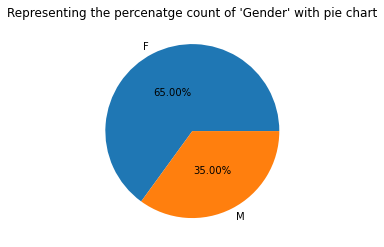

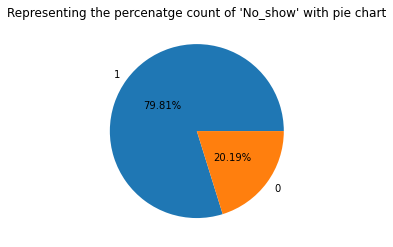

In [65]:
#representing the percentage count in visuals
def plot(x):
    y= dfcc[x].value_counts() #(normalize=True).mul(100).round(1).astype(str) + '%'
    count_index= y.index
    plt.pie(y, labels= count_index, pctdistance=0.5, autopct="%1.2f%%")
    plt.title("Representing the percenatge count of '"+x + "' with pie chart")
    plt.show()
  

plot("Gender")
plot("No_show")


# y= dfcc["Gender"].value_counts() #(normalize=True).mul(100).round(1).astype(str) + '%'
# #     print(y)
# count_index= y.index
# plt.pie(y, labels= count_index, pctdistance=0.5, autopct="%1.2f%%")

In [106]:
# dfcc.groupby("Gender").count()


# Relatiosnhip between those that has Brasillian welfare to those that dosen't showing up on the day.

0    90.2%
1     9.8%
Name: Scholarship, dtype: object
[[ 1.         -0.02913503]
 [-0.02913503  1.        ]]


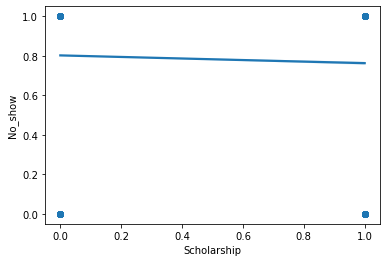

In [80]:
# check if there is correlation between having a schorlaship and showing up for appointmwnt

# print(dfcc["Scholarship"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

def con(x, y):
    a=dfcc[x].to_numpy() #converting the shorlarship colum to np
    b=dfcc[y].to_numpy() #Converting the No_show colum to np
    corr = np.corrcoef(a, b)
    print(dfcc[x].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    return(corr)
   
           
corr_sch_show= con("Scholarship","No_show")
print(corr_sch_show)
sb.regplot(data= dfcc, x= "Scholarship" , y="No_show")
    
# using the iloc function instead of loc
#NB: iloc specify row and colum using their index
a=dfcc.iloc[:, 7].values #converting the shorlarship colum to np
# b=dfcc.iloc[:, -1].values #Converting the No_show colum to np

# print(type(c))

check if there is correlation between having a schorlaship and showing up for appointmwnt

Fmom the above result, it is shown that there is no correlation between the schorlahip and No_show (with a negative correlation coeeficient of -o.029) which signifies that the patient having a barasilain welfare programme is not a determinant of them showing up on appointmnet day.

# Relatiosnhip between those that got message to those that didnt get a message and effect on showing up on the day.

0    67.9%
1    32.1%
Name: SMS_received, dtype: object
[[ 1.         -0.12643066]
 [-0.12643066  1.        ]]


<AxesSubplot:xlabel='SMS_received', ylabel='No_show'>

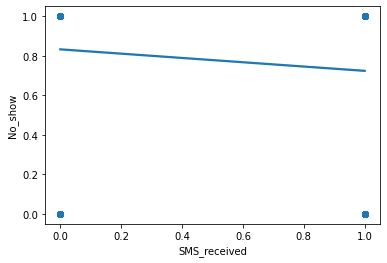

In [102]:
corr_sms_show= con("SMS_received","No_show")
print(corr_sms_show)

sb.regplot(data= dfcc, x="SMS_received", y="No_show" )


Fmom the above result, it is shown that there is no correlation between the SMS received and No_show (with a negative correlation coeeficient of -0.0126) which signifies that the  despite sending an sms with regards to their appointment does not gurantee patient showing up on appointmnet day.

Checking if Age is a barrier to showing up in on appointment day

In [33]:
w= dfcc["Age"].mean()

The mean age of patient is 37.088. 

adult= dfcc.query("Age >37") #the query arguement fished out condition in the enclosed bracket. i.e greater than the mean age
youth= dfcc.query("Age < 37")

<AxesSubplot:xlabel='Gender'>

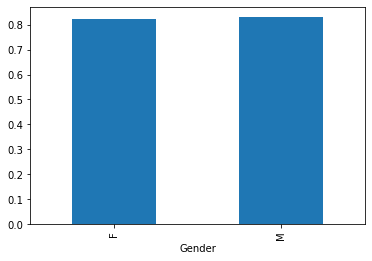

In [48]:
# youth.groupby("Gender")["No_show"].mean().plot(kind= "bar")
adult.groupby("Gender")["No_show"].mean().plot(kind= "bar")

# d= adult.groupby("Gender")["No_show"].mean()
# g= youth.groupby("Gender")["No_show"].mean()
# f= g.values #converting to numpy for easy correlation
# h= d.values
# cor = np.corrcoef(f,h) #finding the correlaton coefficient
# print(cor)
# sb.regplot(data= dfcc, x=f, y=h ); #plotting the correlation graph
# adult["Gender"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
# adult["Gender"].value_counts(normalize=True).plot(kind="pie")

From the plot above, it can be shown that adult male slightly showed up on apointment day than the female (F: 0.822, M=0.8304). Though checking the percetage of  adult male to female, the adult female are more than the male. This observations also cross accross the youth. 

In [99]:
# sb.stripplot(data= dfcc, x= "Gender", y= "No_show")

In [40]:
a=dfcc["ScheduledDay"].to_numpy() 
b=dfcc["AppointmentDay"].to_numpy()

In [103]:
#checking the genearl correlation between column in dataset
dfcc.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,date_diff
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,0.001461,0.001491
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,0.162602,0.771940
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319,-0.034722
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135,0.030229
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701,0.016930
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180,0.027081
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196,0.038529
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076,0.019878
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431,-0.397893
No_show,0.001461,0.162602,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000,0.185819


# Is the difference between schedule date and appointment date affect the showing up on appointment day

In [91]:
#converting the date in object to datetime type

dfcc["ScheduledDay"]= pd.to_datetime(df["ScheduledDay"], errors="coerce")
dfcc["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"], errors= "coerce")

In [93]:
#finding the difference between the date
dfcc["date_diff"]= dfcc["ScheduledDay"]- dfcc["AppointmentDay"]

dfcc.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,date_diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days 18:38:08
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days 16:08:27
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days 16:19:04
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days 17:29:31
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days 16:07:23


In [96]:
#converting the date to numreric for easy correlation 
dfcc.date_diff=pd.to_numeric(dfcc.date_diff)

[[1.        0.1858189]
 [0.1858189 1.       ]]


<AxesSubplot:xlabel='date_diff', ylabel='No_show'>

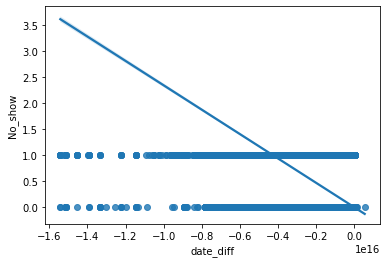

In [101]:
#finding the corellation between the date diff and showing up on appointment date

i=dfcc["date_diff"].to_numpy() #converting the shorlarship colum to np
j=dfcc["No_show"].to_numpy() #Converting the No_show colum to np
corrl = np.corrcoef(i, j)
print(corrl)

sb.regplot(data= dfcc, x="date_diff", y="No_show" )

FRom the result obatined above, it can be duduced that difference in date time between the schedule date and appointment date does not signifies attending the clinic on the appointment date as there is a weak correllation between them.
Therefore even if the difference is two days or on the same date with just time difference, it does not justify showing up

# Conclusion

From the above analysis it can be deduced that patient show up on their appointment date after scheduling an appointment at their own peril, not babsically bacause they have one ailment or the other. it might just be for check-up or to make another compliant